In [480]:
import pandas as pd
import numpy as np
df = pd.read_csv("matches.csv")
df.drop(['gameVersion'],axis=1,inplace=True)
    
print(len(df))
df.head()

4848


,gameId,queueId,seasonId,gameDuration,100_JUNGLE_champ,100_JUNGLE_rank,100_TOP_champ,100_TOP_rank,100_MIDDLE_champ,100_MIDDLE_rank,...,200_JUNGLE_rank,200_TOP_champ,200_TOP_rank,200_MIDDLE_champ,200_MIDDLE_rank,200_BOTTOM_2_champ,200_BOTTOM_2_rank,200_BOTTOM_champ,200_BOTTOM_rank,win
0,516692892,440,9,1731,9,1,164,1,99,1,...,1,31,1,157,1,43,1,236,1,1
1,512867763,420,9,1402,54,1,6,3,38,4,...,1,122,3,55,5,21,2,412,3,0
2,511265795,440,9,1576,81,1,150,4,99,2,...,5,39,4,3,2,51,4,16,1,0
3,511263892,440,9,1508,5,1,150,2,61,4,...,4,57,3,131,3,51,4,89,2,0
4,510483208,440,9,1807,516,1,157,1,36,2,...,3,80,1,38,4,498,2,12,2,0


In [481]:
import numpy as np
np.random.seed(29)
msk = np.random.rand(len(df)) < 0.8

train = df[msk].copy()
test = df[~msk].copy()

train.head()

,gameId,queueId,seasonId,gameDuration,100_JUNGLE_champ,100_JUNGLE_rank,100_TOP_champ,100_TOP_rank,100_MIDDLE_champ,100_MIDDLE_rank,...,200_JUNGLE_rank,200_TOP_champ,200_TOP_rank,200_MIDDLE_champ,200_MIDDLE_rank,200_BOTTOM_2_champ,200_BOTTOM_2_rank,200_BOTTOM_champ,200_BOTTOM_rank,win
1,512867763,420,9,1402,54,1,6,3,38,4,...,1,122,3,55,5,21,2,412,3,0
2,511265795,440,9,1576,81,1,150,4,99,2,...,5,39,4,3,2,51,4,16,1,0
3,511263892,440,9,1508,5,1,150,2,61,4,...,4,57,3,131,3,51,4,89,2,0
4,510483208,440,9,1807,516,1,157,1,36,2,...,3,80,1,38,4,498,2,12,2,0
5,510371693,440,9,1636,59,2,36,1,101,2,...,4,31,4,34,3,113,1,18,1,1


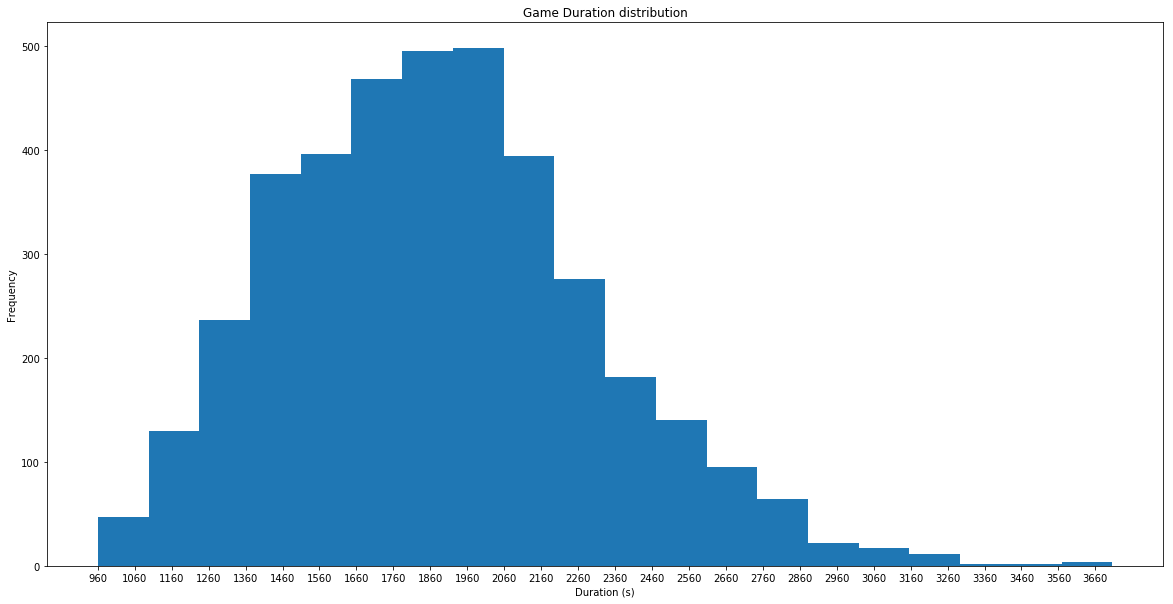

In [482]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.hist(train['gameDuration'], bins=20)
plt.title("Game Duration distribution")
plt.xlabel("Duration (s)")
plt.ylabel("Frequency")
plt.xticks(np.arange(min(train['gameDuration']), max(train['gameDuration']), 100))
plt.show()

In [483]:
print(len(train))
train = train[np.abs(train['gameDuration']-train['gameDuration'].mean())<=(3*train['gameDuration'].std())] 
len(train)

3856


3837

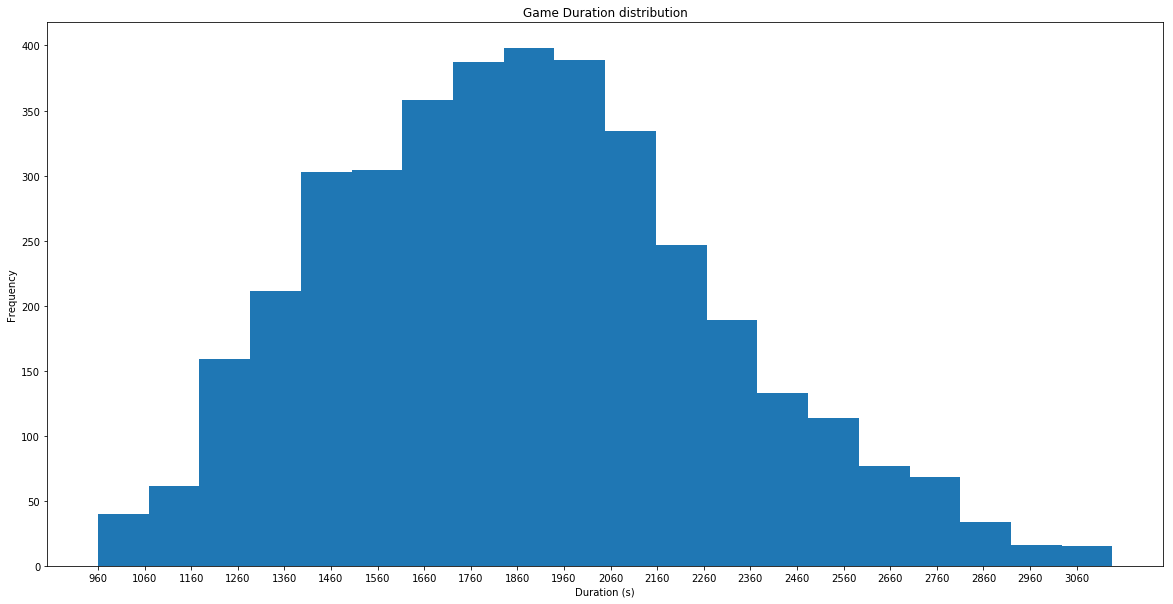

In [484]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.hist(train['gameDuration'], bins=20)
plt.title("Game Duration distribution")
plt.xlabel("Duration (s)")
plt.ylabel("Frequency")
plt.xticks(np.arange(min(train['gameDuration']), max(train['gameDuration']), 100))
plt.show()

In [485]:
train

,gameId,queueId,seasonId,gameDuration,100_JUNGLE_champ,100_JUNGLE_rank,100_TOP_champ,100_TOP_rank,100_MIDDLE_champ,100_MIDDLE_rank,...,200_JUNGLE_rank,200_TOP_champ,200_TOP_rank,200_MIDDLE_champ,200_MIDDLE_rank,200_BOTTOM_2_champ,200_BOTTOM_2_rank,200_BOTTOM_champ,200_BOTTOM_rank,win
1,512867763,420,9,1402,54,1,6,3,38,4,...,1,122,3,55,5,21,2,412,3,0
2,511265795,440,9,1576,81,1,150,4,99,2,...,5,39,4,3,2,51,4,16,1,0
3,511263892,440,9,1508,5,1,150,2,61,4,...,4,57,3,131,3,51,4,89,2,0
4,510483208,440,9,1807,516,1,157,1,36,2,...,3,80,1,38,4,498,2,12,2,0
5,510371693,440,9,1636,59,2,36,1,101,2,...,4,31,4,34,3,113,1,18,1,1
6,520690512,440,9,2343,107,3,83,2,38,3,...,3,236,1,81,3,412,4,29,4,0
8,520604375,440,9,1929,104,3,57,3,238,3,...,3,17,3,69,3,85,4,61,3,1
9,520579488,440,9,1430,5,1,75,3,63,3,...,3,150,3,91,3,99,2,202,2,1
10,520406410,440,9,2132,28,3,41,2,238,3,...,4,2,3,81,3,201,3,67,3,0
11,520414352,440,9,1671,141,3,6,1,245,1,...,1,3,1,81,3,497,1,110,3,1


In [486]:
# https://pastebin.com/raw/JPp5gBkT

top_champs = pd.DataFrame({'champ':list(train['100_TOP_champ'])+list(train['200_TOP_champ'])})
top_champs = top_champs['champ'].value_counts()

jg_champs  = pd.DataFrame({'champ':list(train['100_JUNGLE_champ'])+list(train['200_JUNGLE_champ'])})
jg_champs  = jg_champs['champ'].value_counts()

mid_champs = pd.DataFrame({'champ':list(train['100_MIDDLE_champ'])+list(train['200_MIDDLE_champ'])})
mid_champs = mid_champs['champ'].value_counts()

bot_champs = pd.DataFrame({'champ':list(train['100_BOTTOM_champ'])+list(train['200_BOTTOM_champ'])+list(train['100_BOTTOM_2_champ'])+list(train['200_BOTTOM_2_champ'])})
bot_champs = bot_champs['champ'].value_counts()

top_champs = set(top_champs[top_champs > len(train)*0.005].index)
jg_champs  = set(jg_champs[jg_champs > len(train)*0.005].index)
mid_champs = set(mid_champs[mid_champs > len(train)*0.005].index)
bot_champs = set(bot_champs[bot_champs > len(train)*0.005].index)

train = train[train['100_TOP_champ'].apply(lambda x: x      in top_champs)]
train = train[train['200_TOP_champ'].apply(lambda x: x      in top_champs)]
train = train[train['100_JUNGLE_champ'].apply(lambda x: x   in  jg_champs)]
train = train[train['200_JUNGLE_champ'].apply(lambda x: x   in jg_champs )]
train = train[train['100_MIDDLE_champ'].apply(lambda x: x   in mid_champs)]
train = train[train['200_MIDDLE_champ'].apply(lambda x: x   in mid_champs)]
train = train[train['100_BOTTOM_champ'].apply(lambda x: x   in bot_champs)]
train = train[train['200_BOTTOM_champ'].apply(lambda x: x   in bot_champs)]
train = train[train['100_BOTTOM_2_champ'].apply(lambda x: x in bot_champs)]
train = train[train['200_BOTTOM_2_champ'].apply(lambda x: x in bot_champs)]

len(train)

2870

In [487]:
y_train = train['win']
X_train = train.copy()
X_train.drop(['win','queueId', 'seasonId', 'gameDuration', 'gameId'],axis=1,inplace=True)

X_test = test.copy()
X_test.drop(['win','queueId', 'seasonId', 'gameDuration', 'gameId'],axis=1,inplace=True)

X_train.head()


,100_JUNGLE_champ,100_JUNGLE_rank,100_TOP_champ,100_TOP_rank,100_MIDDLE_champ,100_MIDDLE_rank,100_BOTTOM_2_champ,100_BOTTOM_2_rank,100_BOTTOM_champ,100_BOTTOM_rank,200_JUNGLE_champ,200_JUNGLE_rank,200_TOP_champ,200_TOP_rank,200_MIDDLE_champ,200_MIDDLE_rank,200_BOTTOM_2_champ,200_BOTTOM_2_rank,200_BOTTOM_champ,200_BOTTOM_rank
1,54,1,6,3,38,4,29,4,497,1,81,1,122,3,55,5,21,2,412,3
2,81,1,150,4,99,2,18,3,412,3,64,5,39,4,3,2,51,4,16,1
3,5,1,150,2,61,4,99,3,18,3,141,4,57,3,131,3,51,4,89,2
9,5,1,75,3,63,3,81,3,432,3,64,3,150,3,91,3,99,2,202,2
10,28,3,41,2,238,3,498,3,89,3,24,4,2,3,81,3,201,3,67,3


In [488]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    return (model, score_train, score_test)

In [489]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes = train_model(BernoulliNB(), X_train, y_train, X_test, y_test)

print("Naive Bayes scores:    \t train: %.3f \t test: %.3f"%(naive_bayes[1],naive_bayes[2]))

Naive Bayes scores:    	 train: 0.509 	 test: 0.524


In [490]:
from sklearn.naive_bayes import MultinomialNB
multi_naive_bayes = train_model(MultinomialNB(), X_train, y_train, X_test, y_test)

print("Multinomial Naive Bayes scores:    \t train: %.3f \t test: %.3f"%(multi_naive_bayes[1],multi_naive_bayes[2]))

Multinomial Naive Bayes scores:    	 train: 0.525 	 test: 0.484


In [491]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = train_model(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

print("DecisionTree scores:    \t train: %.3f \t test: %.3f"%(decision_tree[1],decision_tree[2]))

DecisionTree scores:    	 train: 1.000 	 test: 0.509


In [492]:
from sklearn.linear_model import LogisticRegression
logistic = train_model(LogisticRegression(), X_train, y_train, X_test, y_test)

print("LogisticRegression scores:    \t train: %.3f \t test: %.3f"%(logistic[1],logistic[2]))

LogisticRegression scores:    	 train: 0.575 	 test: 0.526


In [493]:
from sklearn.linear_model import SGDClassifier
gradient_descent = train_model(SGDClassifier(max_iter=5,tol=None), X_train, y_train, X_test, y_test)

print("SGD scores:    \t train: %.3f \t test: %.3f"%(gradient_descent[1],gradient_descent[2]))

SGD scores:    	 train: 0.489 	 test: 0.471


In [494]:
from sklearn.svm import SVC
svm = train_model(SVC(), X_train, y_train, X_test, y_test)

print("SVM scores:    \t train: %.3f \t test: %.3f"%(svm[1],svm[2]))

SVM scores:    	 train: 1.000 	 test: 0.524


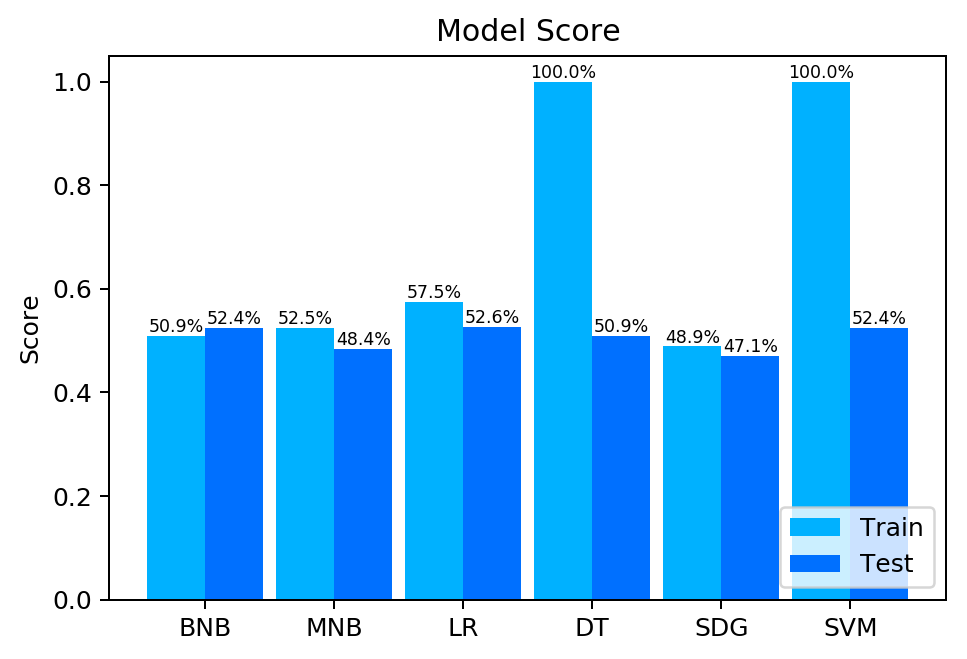

In [495]:
import matplotlib.pyplot as plt
N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.45       # the width of the bars

fig, ax = plt.subplots()

test_scores = (naive_bayes[1], multi_naive_bayes[1], logistic[1], decision_tree[1], gradient_descent[1], svm[1])
train_scores = (naive_bayes[2], multi_naive_bayes[2], logistic[2], decision_tree[2], gradient_descent[2], svm[2])

rects1 = ax.bar(ind, test_scores, width, color='#00b1ff')
rects1b = ax.bar(ind + width, train_scores, width, color='#0070ff')

# add some text for labels, title and axes ticks
ax.set_ylabel('Score')
ax.set_title('Model Score')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('BNB', 'MNB', 'LR', 'DT', 'SDG', 'SVM'))

ax.legend((rects1[0], rects1b[0]), ('Train', 'Test'), loc='lower right')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%.1f%%' % (100*height),
                ha='center', va='bottom', fontsize = 'x-small')

autolabel(rects1)
autolabel(rects1b)
fig.set_dpi(180)

plt.show()